 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [24]:
# Reading whale returns
df_whale_returns = pd.read_csv(Path("Resources/whale_returns.csv"), index_col="Date", parse_dates=True, infer_datetime_format=True)
df_whale_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [25]:
# Count nulls
df_whale_returns.isnull().count()

SOROS FUND MANAGEMENT LLC      1060
PAULSON & CO.INC.              1060
TIGER GLOBAL MANAGEMENT LLC    1060
BERKSHIRE HATHAWAY INC         1060
dtype: int64

In [26]:
# Drop nulls
df_whale_returns.dropna()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652
...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [33]:
# Reading algorithmic returns
df_algo_returns = pd.read_csv(Path('Resources/algo_returns.csv'), index_col="Date", parse_dates=True, infer_datetime_format=True)
df_algo_returns.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [34]:
# Count nulls
df_algo_returns.isnull().count()

Algo 1    1241
Algo 2    1241
dtype: int64

In [35]:
# Drop nulls
df_algo_returns.dropna()


,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [36]:
# Reading S&P 500 Closing Prices
df_sp500_history = pd.read_csv(Path("Resources/sp500_history.csv"), index_col="Date", parse_dates=True, infer_datetime_format=True)
df_sp500_history.head()

,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06


In [ ]:
# Check Data Types
df_sp500_history.dtypes

In [19]:
# Fix Data Types
df_sp500_history['Close'] = df_sp500_history['Close'].str.replace("$", " ") 
df_sp500_history['Close'] = df_sp500_history['Close'].astype('float')

df_sp500_history.dtypes

/var/folders/ld/701kz1kn1vd3s8r65151rc680000gn/T/ipykernel_1589/533279025.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_sp500_history['Close'] = df_sp500_history['Close'].str.replace("$", " ")


Close    float64
dtype: object

In [20]:
# Calculate Daily Returns
sp500_daily_returns = pd.DataFrame(df_sp500_history["Close"].pct_change())
sp500_daily_returns.head()

,Close
Date,
23-Apr-19,NaN
22-Apr-19,-0.008764
18-Apr-19,-0.001011
17-Apr-19,-0.001577
16-Apr-19,0.002279


In [21]:
# Drop nulls
sp500_daily_returns.dropna()

,Close
Date,
22-Apr-19,-0.008764
18-Apr-19,-0.001011
17-Apr-19,-0.001577
16-Apr-19,0.002279
15-Apr-19,-0.000509
...,...
5-Oct-12,0.003469
4-Oct-12,0.000322
3-Oct-12,-0.007123


In [22]:
# Rename `Close` Column to be specific to this portfolio.
sp500_daily_returns.rename(columns = {'Close':'S&P 500'}, inplace = True)
sp500_daily_returns.head()

,S&P 500
Date,
23-Apr-19,NaN
22-Apr-19,-0.008764
18-Apr-19,-0.001011
17-Apr-19,-0.001577
16-Apr-19,0.002279


## Combine Whale, Algorithmic, and S&P 500 Returns

In [37]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
df_combined = pd.concat([df_whale_returns, df_algo_returns, sp500_daily_returns], axis='columns', join='inner')
df_combined.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot: xlabel='Date'>

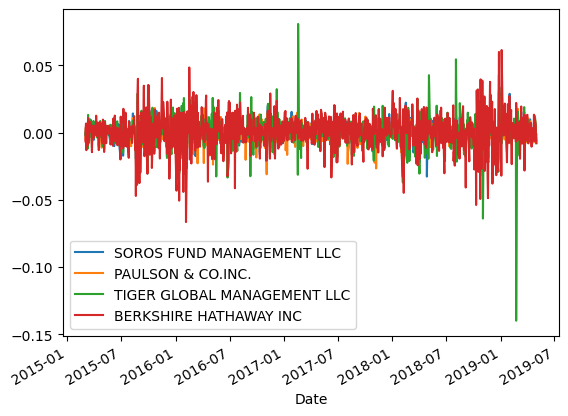

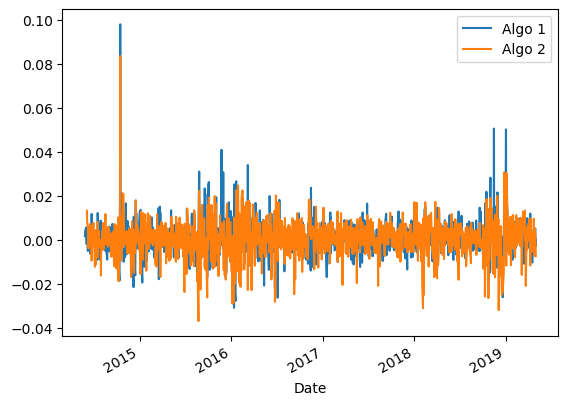

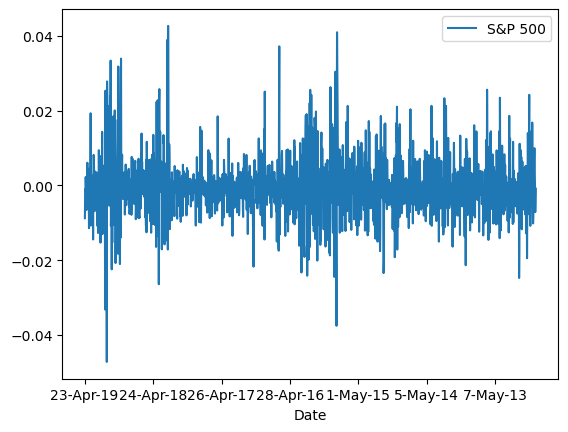

In [40]:
# Plot daily returns of all portfolios
df_whale_returns.plot()
df_algo_returns.plot()
sp500_daily_returns.plot()

#### Calculate and Plot cumulative returns.

<AxesSubplot: xlabel='Date'>

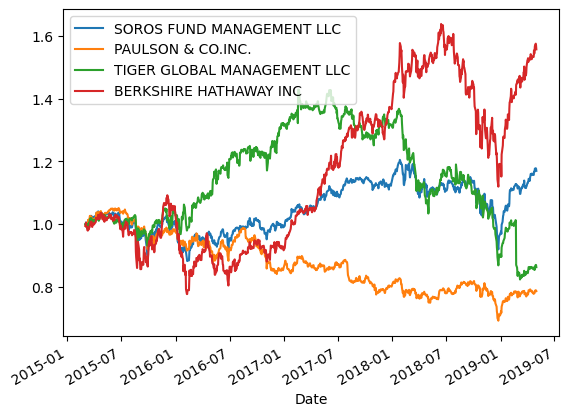

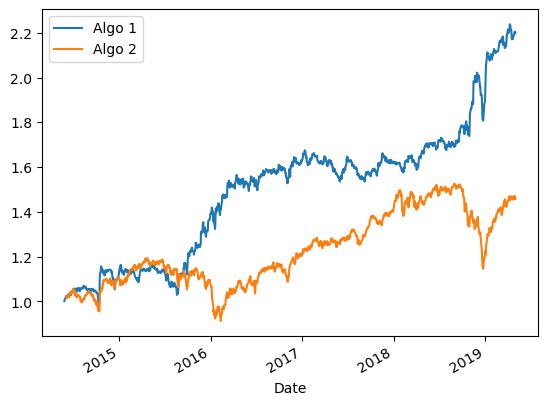

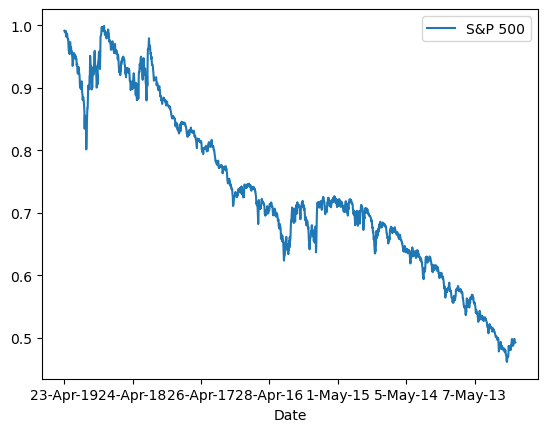

In [44]:
# Calculate cumulative returns of all portfolios
whale_cumulative_returns = (1 + df_whale_returns).cumprod()
algo_cumulative_returns = (1 + df_algo_returns).cumprod()
sp500_cumulative_returns = (1 + sp500_daily_returns).cumprod()
# Plot cumulative returns
whale_cumulative_returns.plot()
algo_cumulative_returns.plot()
sp500_cumulative_returns.plot()

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot: >

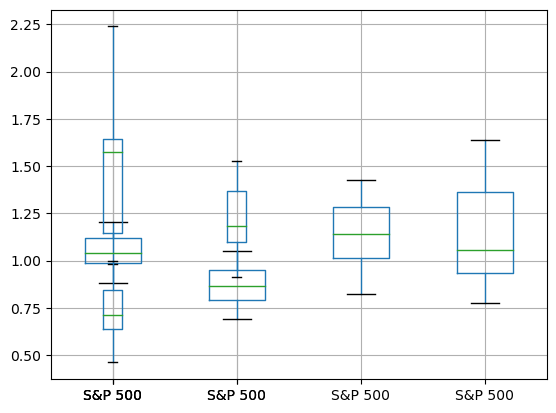

In [75]:
# Box plot to visually show risk
whale_cumulative_returns.boxplot()
algo_cumulative_returns.boxplot()
sp500_cumulative_returns.boxplot()

### Calculate Standard Deviations

In [83]:
# Calculate the daily standard deviations of all portfolios
soros_daily_std = df_whale_returns["SOROS FUND MANAGEMENT LLC"].std()
paulson_daily_std = df_whale_returns["PAULSON & CO.INC. "].std()
tiger_daily_std = df_whale_returns["TIGER GLOBAL MANAGEMENT LLC"].std()
brk_daily_std = df_whale_returns["BERKSHIRE HATHAWAY INC"].std()
algo1_std = df_algo_returns["Algo 1"].std()
algo2_std = df_algo_returns["Algo 2"].std()

### Determine which portfolios are riskier than the S&P 500

In [84]:
# Calculate  the daily standard deviation of S&P 500
sp500_std = sp500_daily_returns.std()
# Determine which portfolios are riskier than the S&P 500
print(f"Soros Fund Management Standard Deviation: {soros_daily_std}")
print(f"Paulson & Co Inc Standard Deviation: {paulson_daily_std}")
print(f"Tiger Global Management Standard Deviation: {tiger_daily_std}")
print(f"Berkshire Hathaway Standard Deviation: {brk_daily_std}")
print(f"Algo 1 Standard Deviation: {algo1_std}")
print(f"Algo 2 Standard Deviation: {algo2_std}")
print(f"S&P 500 Standard Deviation: {sp500_std}")

Soros Fund Management Standard Deviation: 0.007841963643697844
Paulson & Co Inc Standard Deviation: 0.006976871441189292
Tiger Global Management Standard Deviation: 0.010824284252598572
Berkshire Hathaway Standard Deviation: 0.012830767486751285
Algo 1 Standard Deviation: 0.0079723945311978
Algo 2 Standard Deviation: 0.008466462172749697
S&P 500 Standard Deviation: S&P 500    0.008135
dtype: float64


### Calculate the Annualized Standard Deviation

In [85]:
# Calculate the annualized standard deviation (252 trading days)
sp500_std_annualized = sp500_std * np.sqrt(252)
sp500_std_annualized

S&P 500    0.129133
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot: xlabel='Date'>

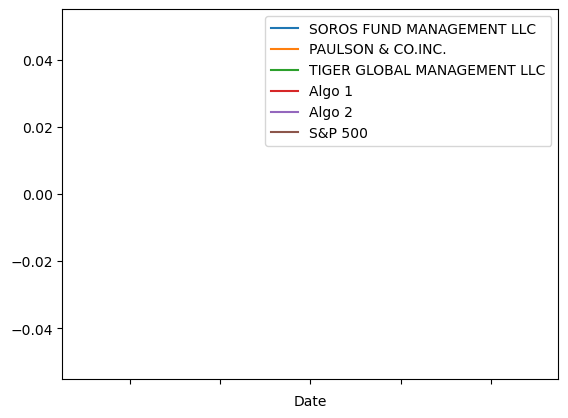

In [92]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
soros_21day_std = df_whale_returns["SOROS FUND MANAGEMENT LLC"].rolling(window=21).std()
paulson_21day_std = df_whale_returns["PAULSON & CO.INC. "].rolling(window=21).std()
tiger_21day_std = df_whale_returns["TIGER GLOBAL MANAGEMENT LLC"].rolling(window=21).std()
brk_21day_std = df_whale_returns["BERKSHIRE HATHAWAY INC"].rolling(window=21).std()
algo1_21day_std = df_algo_returns["Algo 1"].rolling(window=21).std()
algo2_21day_std = df_algo_returns["Algo 2"].rolling(window=21).std()
sp500_21day_std = sp500_daily_returns.rolling(window=21).std()
# Plot the rolling standard deviation
combined_21day_df = pd.concat([soros_21day_std, paulson_21day_std, tiger_21day_std, algo1_21day_std, algo2_21day_std, sp500_21day_std], axis="columns", join="inner")
combined_21day_df.plot()

### Calculate and plot the correlation

In [94]:
# Calculate the correlation
combined_correlation = combined_21day_df.corr
# Display de correlation matrix
combined_correlation

<bound method DataFrame.corr of Empty DataFrame
Columns: [SOROS FUND MANAGEMENT LLC, PAULSON & CO.INC. , TIGER GLOBAL MANAGEMENT LLC, Algo 1, Algo 2, S&P 500]
Index: []>

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

In [103]:
# Calculate covariance of a single portfolio
algo1_returns = df_algo_returns['Algo 1']
covariance = algo1_returns.cov(sp500_daily_returns)
# Calculate variance of S&P 500
sp500_variance = sp500_daily_returns.var
# Computing beta
beta = covariance / sp500_variance
# Plot beta trend
beta.plot()

nan

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

In [ ]:
# Use `ewm` to calculate the rolling window


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [ ]:
# Annualized Sharpe Ratios


In [ ]:
# Visualize the sharpe ratios as a bar plot


### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [105]:
# Reading data from 1st stock
aapl_df = pd.read_csv(Path('Resources/aapl_historical.csv'), index_col='Trade DATE', parse_dates=True, infer_datetime_format=True)

In [106]:
# Reading data from 2nd stock
cost_df = pd.read_csv(Path('Resources/cost_historical.csv'), index_col='Trade DATE', parse_dates=True, infer_datetime_format=True)

In [107]:
# Reading data from 3rd stock
goog_df = pd.read_csv(Path('Resources/goog_historical.csv'), index_col='Trade DATE', parse_dates=True, infer_datetime_format=True)

In [132]:
# Combine all stocks in a single DataFrame
combined_df = pd.concat([aapl_df, cost_df, goog_df], axis='columns', join='inner')
combined_df.head()

,Symbol,NOCP,Symbol,NOCP,Symbol,NOCP
Trade DATE,,,,,,
2019-05-09,AAPL,200.72,COST,243.47,GOOG,1162.38
2019-05-08,AAPL,202.90,COST,241.34,GOOG,1166.27
2019-05-07,AAPL,202.86,COST,240.18,GOOG,1174.10
2019-05-06,AAPL,208.48,COST,244.23,GOOG,1189.39
2019-05-03,AAPL,211.75,COST,244.62,GOOG,1185.40


In [133]:
# Reset Date index
combined_df.reset_index()

,Trade DATE,Symbol,NOCP,Symbol,NOCP,Symbol,NOCP
0,2019-05-09,AAPL,200.72,COST,243.47,GOOG,1162.38
1,2019-05-08,AAPL,202.90,COST,241.34,GOOG,1166.27
2,2019-05-07,AAPL,202.86,COST,240.18,GOOG,1174.10
3,2019-05-06,AAPL,208.48,COST,244.23,GOOG,1189.39
4,2019-05-03,AAPL,211.75,COST,244.62,GOOG,1185.40
...,...,...,...,...,...,...,...
245,2018-05-17,AAPL,186.99,COST,199.60,GOOG,1078.59
246,2018-05-16,AAPL,188.18,COST,198.71,GOOG,1081.77
247,2018-05-15,AAPL,186.44,COST,195.48,GOOG,1079.23
248,2018-05-14,AAPL,188.15,COST,195.88,GOOG,1100.20


In [136]:
# Reorganize portfolio data by having a column per symbol
combined_df.drop(columns=['Symbol'], inplace=True)
columns = ['AAPL', 'COST', 'GOOG']
combined_df.columns = columns
combined_df.head()

,AAPL,COST,GOOG
Trade DATE,,,
2019-05-09,200.72,243.47,1162.38
2019-05-08,202.90,241.34,1166.27
2019-05-07,202.86,240.18,1174.10
2019-05-06,208.48,244.23,1189.39
2019-05-03,211.75,244.62,1185.40


In [137]:

# Calculate daily returns
daily_returns = combined_df.pct_change()
# Drop NAs
daily_returns.dropna()
# Display sample data
daily_returns.head()

,AAPL,COST,GOOG
Trade DATE,,,
2019-05-09,NaN,NaN,NaN
2019-05-08,0.010861,-0.008749,0.003347
2019-05-07,-0.000197,-0.004806,0.006714
2019-05-06,0.027704,0.016862,0.013023
2019-05-03,0.015685,0.001597,-0.003355


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [138]:
# Set weights
weights = [.33, .33, .33]

# Calculate portfolio return
portfolio_returns = daily_returns.dot(weights)
# Display sample data

portfolio_returns.head()

Trade DATE
2019-05-09         NaN
2019-05-08    0.001801
2019-05-07    0.000564
2019-05-06    0.019004
2019-05-03    0.004596
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [142]:
# Join your returns DataFrame to the original returns DataFrame
combined_returns = pd.concat([daily_returns, portfolio_returns], axis='columns', join='inner')
columns = ['AAPL', 'COST', 'GOOG', 'Portfolio']
combined_returns.columns = columns
combined_returns.head()

,AAPL,COST,GOOG,Portfolio
Trade DATE,,,,
2019-05-09,NaN,NaN,NaN,NaN
2019-05-08,0.010861,-0.008749,0.003347,0.001801
2019-05-07,-0.000197,-0.004806,0.006714,0.000564
2019-05-06,0.027704,0.016862,0.013023,0.019004
2019-05-03,0.015685,0.001597,-0.003355,0.004596


In [143]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
combined_returns.dropna()

,AAPL,COST,GOOG,Portfolio
Trade DATE,,,,
2019-05-08,0.010861,-0.008749,0.003347,0.001801
2019-05-07,-0.000197,-0.004806,0.006714,0.000564
2019-05-06,0.027704,0.016862,0.013023,0.019004
2019-05-03,0.015685,0.001597,-0.003355,0.004596
2019-05-02,-0.012279,-0.007890,-0.019226,-0.013000
...,...,...,...,...
2018-05-17,0.003650,0.003217,0.011469,0.006051
2018-05-16,0.006364,-0.004459,0.002948,0.001602
2018-05-15,-0.009246,-0.016255,-0.002348,-0.009190


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [145]:
# Calculate the annualized `std`
combined_returns_annualized_std = combined_returns * np.sqrt(252)
combined_returns_annualized_std

,AAPL,COST,GOOG,Portfolio
Trade DATE,,,,
2019-05-09,NaN,NaN,NaN,NaN
2019-05-08,0.172411,-0.138878,0.053125,0.028597
2019-05-07,-0.003130,-0.076301,0.106577,0.008958
2019-05-06,0.439785,0.267682,0.206730,0.301685
2019-05-03,0.248991,0.025349,-0.053254,0.072959
...,...,...,...,...
2018-05-17,0.057939,0.051064,0.182063,0.096052
2018-05-16,0.101025,-0.070783,0.046803,0.025425
2018-05-15,-0.146783,-0.258038,-0.037273,-0.145891


### Calculate and plot rolling `std` with 21-day window

<AxesSubplot: xlabel='Trade DATE'>

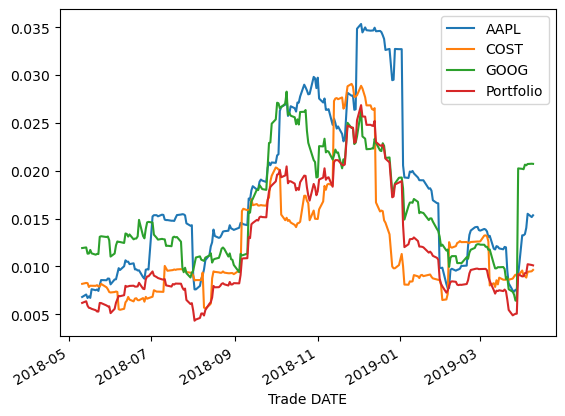

In [147]:
# Calculate rolling standard deviation
combined_returns_std = combined_returns.rolling(window=21).std()
# Plot rolling standard deviation
combined_returns_std.plot()

### Calculate and plot the correlation

In [149]:
# Calculate and plot the correlation
correlation = combined_returns.corr()
correlation

,AAPL,COST,GOOG,Portfolio
AAPL,1.000000,0.413964,0.648156,0.881018
COST,0.413964,1.000000,0.375228,0.687074
GOOG,0.648156,0.375228,1.000000,0.848645
Portfolio,0.881018,0.687074,0.848645,1.000000


### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

In [159]:
# Calculate and plot Beta
covariance = combined_returns['Portfolio'].cov(sp500_daily_returns)
covariance

nan

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [156]:
# Calculate Annualized Sharpe Ratios


,Portfolio
Trade DATE,
2019-05-09,NaN
2019-05-08,0.001801
2019-05-07,0.000564
2019-05-06,0.019004
2019-05-03,0.004596


In [ ]:
# Visualize the sharpe ratios as a bar plot


### How does your portfolio do?

Write your answer here!